In [71]:
import csv
import numpy as np
import matplotlib.pyplot as plt

csv_file = open('D1.csv', 'r')

data_pointer = csv.reader(csv_file)

data_set = []
target_set = []
cluster0_data = []
cluster1_data = []
cluster2_data = []

count = 0

for row in data_pointer:
    count +=1
    data_point = row[0].split('\t')
    
    data_set.append(data_point[0:64])
    target_set.append(data_point[64])

    if(float(data_point[64]) == 0):
        cluster0_data.append(data_point[0:64])
    if(float(data_point[64]) == 1):    
        cluster1_data.append(data_point[0:64])
    if(float(data_point[64]) == 2):
        cluster2_data.append(data_point[0:64])
    
cluster0_data = np.array(cluster0_data)
cluster1_data = np.array(cluster1_data)
cluster2_data = np.array(cluster2_data)

cluster0_data = cluster0_data.astype(float)
cluster1_data = cluster1_data.astype(float)
cluster2_data = cluster2_data.astype(float)

#calculating the mean of each cluster
cluster0_mean = np.mean(cluster0_data, axis = 0)
cluster1_mean = np.mean(cluster1_data, axis = 0)
cluster2_mean = np.mean(cluster2_data, axis = 0)


#implementing Linear Discriminant Analysis

#calculating the mean of the entire data set
data_set = np.array(data_set)
data_set = data_set.astype(float)
target_set = np.array(target_set)
target_set = target_set.astype(float)

mean_data = np.mean(data_set, axis = 0)

#calculating the within class scatter matrix
within_class_scatter_matrix = np.zeros((64,64))

# print(type(within_class_scatter_matrix))

# for i in range(len(data_set)):
#     within_class_scatter_matrix += (data_set[i].reshape(64,1) - mean_data.reshape(64,1)).dot((data_set[i].reshape(64,1) - mean_data.reshape(64,1)).T)




for i in range(len(cluster0_data)):
    within_class_scatter_matrix += (cluster0_data[i].reshape(64,1) - cluster0_mean.reshape(64,1)).dot((cluster0_data[i].reshape(64,1) - cluster0_mean.reshape(64,1)).T)

for i in range(len(cluster1_data)):
    within_class_scatter_matrix += (cluster1_data[i].reshape(64,1) - cluster1_mean.reshape(64,1)).dot((cluster1_data[i].reshape(64,1) - cluster1_mean.reshape(64,1)).T)

for i in range(len(cluster2_data)):
    within_class_scatter_matrix += (cluster2_data[i].reshape(64,1) - cluster2_mean.reshape(64,1)).dot((cluster2_data[i].reshape(64,1) - cluster2_mean.reshape(64,1)).T)

#calculating the between class scatter matrix

between_class_scatter_matrix = np.zeros((64,64))

between_class_scatter_matrix += len(cluster0_data) * (cluster0_mean.reshape(64,1) - mean_data.reshape(64,1)).dot((cluster0_mean.reshape(64,1) - mean_data.reshape(64,1)).T)
between_class_scatter_matrix += len(cluster1_data) * (cluster1_mean.reshape(64,1) - mean_data.reshape(64,1)).dot((cluster1_mean.reshape(64,1) - mean_data.reshape(64,1)).T)
between_class_scatter_matrix += len(cluster2_data) * (cluster2_mean.reshape(64,1) - mean_data.reshape(64,1)).dot((cluster2_mean.reshape(64,1) - mean_data.reshape(64,1)).T)


# print(within_class_scatter_matrix)
#calculating the eigen values and eigen vectors

#calculate the det of the within class scatter matrix

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.pinv(within_class_scatter_matrix).dot(between_class_scatter_matrix))



#sorting the eigen values in descending order

eigen_vectors = eigen_vectors.T

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

#choosing the top 2 eigen vectors

w_matrix = np.hstack((eigen_pairs[0][1].reshape(64,1), eigen_pairs[1][1].reshape(64,1)))

#transforming the data set
# print(w_matrix)


transformed_data = data_set.dot(w_matrix)
# print(transformed_data)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


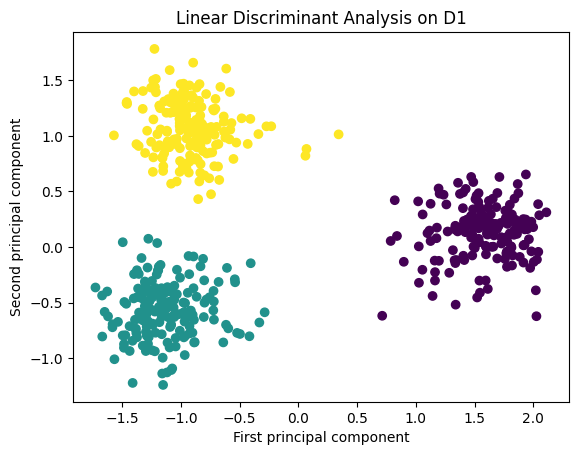

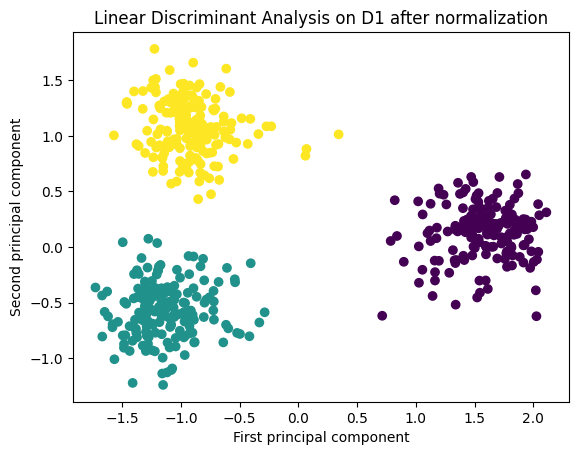

In [72]:
# plotting the transformed data



plt.scatter(transformed_data[:,0], transformed_data[:,1], c = target_set)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title("Linear Discriminant Analysis on D1")
plt.show()

#After normalization the graph is as follows
plt.scatter(transformed_data[:,0], transformed_data[:,1], c = target_set)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title("Linear Discriminant Analysis on D1 after normalization")
plt.show()

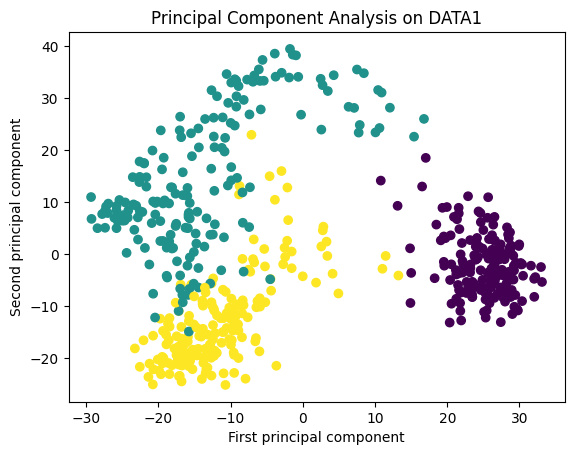

In [73]:
from sklearn.decomposition import PCA
# from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random

# iris = load_iris()
X = data_set
y = target_set

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title("Principal Component Analysis on DATA1")
plt.show()



accuracy:  100.0 %


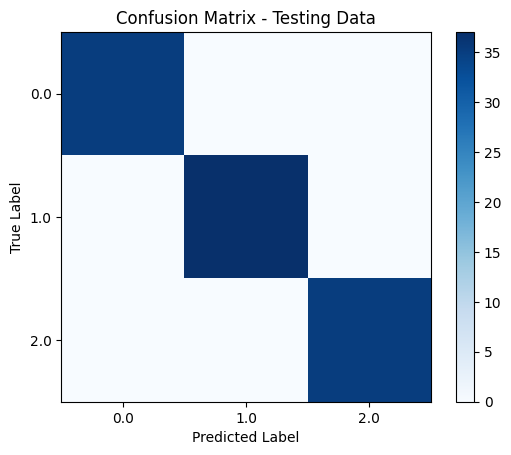

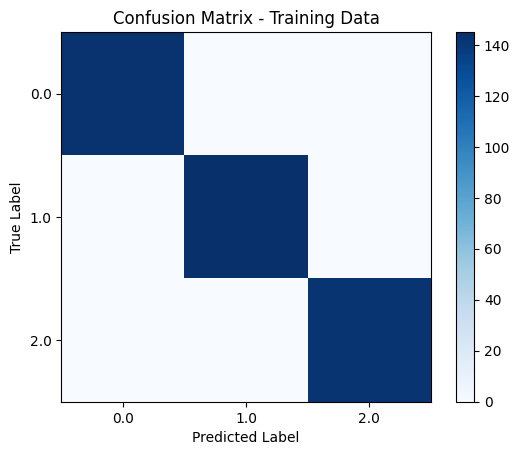

In [74]:
# naive bayes classifier sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.pyplot as plt



def divide_data(data, target_set):
    train_data = []
    test_data = []
    train_label = []
    test_label = []
    
#     random.shuffle(data)
    for i in range(len(data)):
        if i < 0.8 * len(data):
            temp = list()
            temp.append(data[i][0].real)
            temp.append(data[i][1].real)
            train_data.append(temp)
            train_label.append(target_set[i])
        else:
            temp = list()
            temp.append(data[i][0].real)
            temp.append(data[i][1].real)
            test_data.append(temp)
            test_label.append(target_set[i])
    # print(len(train_data),len(test_data))
    return train_data,test_data, train_label, test_label

# print(len(transformed_data))
train_data,test_data, train_label, test_label = divide_data(transformed_data, target_set)


# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()


train_data = np.array(train_data)
train_label = np.array(train_label)


gnb.fit(train_data, train_label)

test_data = np.array(test_data)
# Make predictions on the testing set
y_pred = gnb.predict(test_data)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(test_label, y_pred)
# print("Accuracy:", accuracy)

print("accuracy: ",accuracy*100,"%")




#confusion matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score



# separate features (X) and labels (Y) in training data
train_X = train_data
train_Y = train_label

# separate features (X) and labels (Y) in testing data
test_X = test_data
test_Y = test_label

# train Naive Bayes classifier on training data
clf = GaussianNB()
clf.fit(train_X, train_Y)

# predict labels for testing data
test_Y_pred = clf.predict(test_X)

# predict labels for training data
train_Y_pred = clf.predict(train_X)



# calculate accuracy and confusion matrix for testing data
test_acc = accuracy_score(test_Y, test_Y_pred)
test_cm = confusion_matrix(test_Y, test_Y_pred)

# calculate accuracy and confusion matrix for training data
train_acc = accuracy_score(train_Y, train_Y_pred)
train_cm = confusion_matrix(train_Y, train_Y_pred)

# print(train_acc)
# print(test_acc)


# plot confusion matrix for testing data
plt.figure()
plt.imshow(test_cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Testing Data')
plt.colorbar()
tick_marks = np.arange(len(set(train_Y)))
plt.xticks(tick_marks, list(set(train_Y)))
plt.yticks(tick_marks, list(set(train_Y)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# plot confusion matrix for training data
plt.figure()
plt.imshow(train_cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
tick_marks = np.arange(len(set(train_Y)))
plt.xticks(tick_marks, list(set(train_Y)))
plt.yticks(tick_marks, list(set(train_Y)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# #find the max element in the transformed data with idex 0
# x_max = (max(transformed_data, key=lambda x:x[0]))[0]

# #find the min element in the transformed data with idex 0
# x_min = (min(transformed_data, key=lambda x:x[0]))[0]

# #find the max element in the transformed data with idex 1
# y_max = (max(transformed_data, key=lambda x:x[1]))[1]

# #find the min element in the transformed data with idex 1
# y_min = (min(transformed_data, key=lambda x:x[1]))[1]

# #append only first element of the test data into a list
# test_data_x = []
# for i in range(len(test_data)):
#     test_data_x.append(test_data[i][0])

# #append only second element of the test data into a list
# test_data_y = []
# for i in range(len(test_data)):
#     test_data_y.append(test_data[i][1])
    

# # plot classification boundary and test data
# plt.figure()

# # x_min, x_max = data['X'].min() - 1, data['X'].max() + 1
# # y_min, y_max = data['Y'].min() - 1, data['Y'].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.4)
# # plt.scatter(test_X['X'], test_X['Y'], c=test_Y, s=20, edgecolor='k')
# plt.scatter(test_data_x, test_data_y, c=test_Y, s=20, edgecolor='k')
# plt.title('Test Data with Classification Boundary')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# print("Test Accuracy:", test_acc)
# print("Train Accuracy:", train_acc)